# Whelks and lobsters -- context operator

## The system

In [1]:
%display latex

In [2]:
from lbuc import *

In [3]:
from lbuc.bondcalculus import *

In [4]:
!ls

'BC 2 old.ipynb'
'BC 2.ipynb'
'Lotka-Volterra role reversal.ipynb'
'Sensitivity analysis.ipynb'
 Untitled.ipynb
'W&L context operator context signal test.ipynb'
'W&L physical subdivision.ipynb'
'WandL context mask tidied.ipynb'
'Whelks and lobsters -- Split context, New Context Signals.ipynb'
'Whelks and lobsters -- Split context-Copy2 copy.ipynb'
'Whelks and lobsters -- Split context-Copy2.ipynb'
'Whelks and lobsters context 2.ipynb'
'Whelks and lobsters context 4.ipynb'
'Whelks and lobsters context signals with masks 2 BC.ipynb'
'Whelks and lobsters context signals with masks 2.ipynb'
'Whelks and lobsters context signals with masks.ipynb'
 WhelksAndLobsters.bond
 cysignals_crash_logs
 phase-portrait.pdf
 phase_portrait.pdf


In [5]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [6]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [7]:
!cat /tmp/bond-sage-script-90g57kp5.py

from sage.all import *
import sympy as sym

R, x = PolynomialRing(RIF, 2, ', '.join(map('x{}'.format, range(0, 2)))).objgens()
xsr = [SR.var(str(x1)) for x1 in x]
for v in xsr:
   assume(v, 'real')
xsym = sym.var(','.join(map('x{}'.format, range(0,2))))
asym = sym.var(','.join(map('a{}'.format, range(0,8))))
y0 = [RIF('[4.00000000000000000000 .. 6.00000000000000000000]'), RIF('[0.99999999999999990000 .. 1.20000000000000020000]')]
ysymraw = [(x0) * ((a0) * ((x1) * (2.0))) + (x0) * (((x1) * (-1)) * ((x1) * (2.0))) + (-1) * ((x0) * (a1)) + (-1) * ((x0) * ((x0) * (a2))), (x1) * (a3) + ((x1) * (-1)) * ((x1) * (a4)) + (-1) * ((x0) * ((a5) * ((x1) * (a6)))) + (-1) * ((x0) * (((x1) * (-1)) * ((x1) * (a7))))]
ysym = [sym.simplify(y1) for y1 in ysymraw]
ysr = [y1._sage_().substitute(a0=RIF('[0.79999999999999990000 .. 0.80000000000000000000]'),a1=RIF('[0.04999999999999999600 .. 0.05000000000000000000]'),a2=RIF('[0.04999999999999999600 .. 0.05000000000000000000]'),a3=RIF('[0.60000000000000000000 .

In [8]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-1fczgbpu.py"' ...


In [9]:
u = (x, y) = reversed(s.x)

In [10]:
vf = vector(reversed(s.y))

In [11]:
vf

(0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1, -2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0)

In [12]:
x2 = s.y0

In [13]:
v2 = [RIF(1,1.2), RIF(4,6)]

In [14]:
v3 = v2 # [RIF(1,1.1), RIF(4,5)]

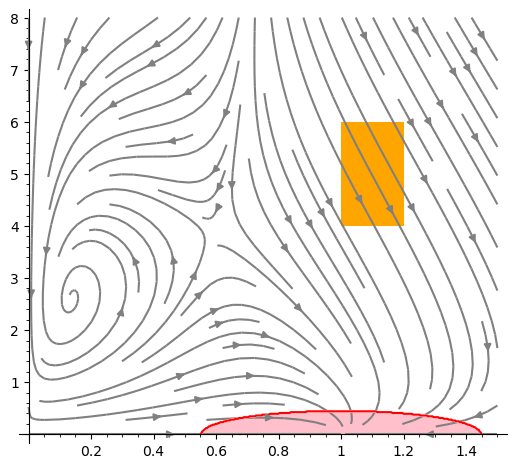

In [15]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.save("phase-portrait.pdf")
p.show()

## Simple signal

In [16]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 > 0.2)

phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))
Computed 96 flowpipes in 0.410680664004758 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f55fd108160>, 0, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 5.2020000000000009], [[0.10000000000000000 .. 5.2020000000000009]]))
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.69 seconds
roots = [[0.72899770431682586 .. 2.3396961789293478], [2.4054956907643583 .. 2.4223569572167918]]
domain = [0.0000000000000000 .. 5.2020000000000009]
roots = [[0.7289

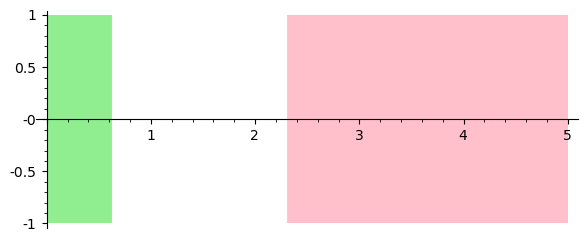

In [17]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fc03d2c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachT

top-level root detection: 1 items in 0.11 seconds
roots = [[1.9494069953384487 .. 2.2661983340704222]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9494069953384487 .. 2.2661983340704222]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9494069953384487 .. 2.2661983340704222]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8494069953384487], True), ([2.1661983340704225 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8494069953384487], True), ([2.1661983340704225 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(L

top-level root detection: 1 items in 0.18 seconds
roots = [[1.1587772868248296 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(L

top-level root detection: 1 items in 0.13 seconds
roots = [[1.8705153484842031 .. 2.2286463799981329]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8705153484842031 .. 2.2286463799981329]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8705153484842031 .. 2.2286463799981329]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7705153484842032], True), ([2.1286463799981332 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7705153484842032], True), ([2.1286463799981332 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(L

top-level root detection: 1 items in 0.20 seconds
roots = [[1.0315253521806846 .. 2.1341310578689115]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.0315253521806846 .. 2.1341310578689115]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.0315253521806846 .. 2.1341310578689115]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.93152535218068456], True), ([2.0341310578689117 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.93152535218068456], True), ([2.0341310578689117 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lob

top-level root detection: 1 items in 0.15 seconds
roots = [[1.1587772868248296 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None


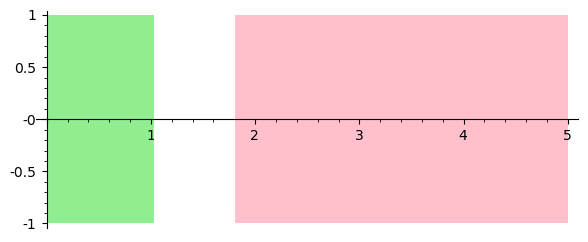

In [18]:
csig = F(RIF(0.1, 0.2), P).context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=False,
)
sig = csig.refined_signal(2)
sig.plot()

 ==> creating ContextSignal with coord=(0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fc03d2c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=None
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000

top-level root detection: 1 items in 0.10 seconds
roots = [[2.0427769291986850 .. 2.1977550698566813]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0427769291986850 .. 2.1977550698566813]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0427769291986850 .. 2.1977550698566813]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9427769291986850], True), ([2.0977550698566815 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9427769291986850], True), ([2.0977550698566815 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.10 seconds
roots = [[2.1245349041032195 .. 2.3020681520537659]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1245349041032195 .. 2.3020681520537659]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1245349041032195 .. 2.3020681520537659]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0245349041032195], True), ([2.2020681520537661 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0245349041032195], True), ([2.2020681520537661 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 2, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.11 seconds
roots = [[2.0230384317242866 .. 2.0263467942482989], [2.0279366837973880 .. 2.1904513946812814]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0230384317242866 .. 2.0263467942482989], 
 [2.0279366837973880 .. 2.1904513946812814]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0230384317242866 .. 2.0263467942482989], 
 [2.0279366837973880 .. 2.1904513946812814]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9279366837973880], True), ([2.0904513946812817 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9279366837973880], True), ([2.0904513946812817 .. 5.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.12 seconds
roots = [[1.9391959749471094 .. 2.0896411533639046]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9391959749471094 .. 2.0896411533639046]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9391959749471094 .. 2.0896411533639046]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8391959749471095], True), ([1.9896411533639046 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8391959749471095], True), ([1.9896411533639046 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.10 seconds
roots = [[1.9511050818011215 .. 2.0263467942482989]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9511050818011215 .. 2.0263467942482989]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9511050818011215 .. 2.0263467942482989]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8511050818011215], True), ([1.9263467942482990 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8511050818011215], True), ([1.9263467942482990 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 1), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.10 seconds
roots = [[1.9052385122651651 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9052385122651651 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9052385122651651 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8052385122651651], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8052385122651651], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 1, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.10 seconds
roots = [[1.9462537948343332 .. 2.0220094507500966]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9462537948343332 .. 2.0220094507500966]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9462537948343332 .. 2.0220094507500966]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8462537948343332], True), ([1.9220094507500966 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8462537948343332], True), ([1.9220094507500966 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 2, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.8978932944984567 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8978932944984567 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8978932944984567 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 3, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7978932944984567], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7978932944984567], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[2.1115531222554770 .. 2.2656256556182215]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1115531222554770 .. 2.2656256556182215]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1115531222554770 .. 2.2656256556182215]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0115531222554770], True), ([2.1656256556182218 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0115531222554770], True), ([2.1656256556182218 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.10 seconds
roots = [[2.1179078909151907 .. 2.1962353240503121]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1179078909151907 .. 2.1962353240503121]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1179078909151907 .. 2.1962353240503121]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0179078909151907], True), ([2.0962353240503124 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0179078909151907], True), ([2.0962353240503124 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 1), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.09 seconds
roots = [[2.0658884603314033 .. 2.1389662344800003]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0658884603314033 .. 2.1389662344800003]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0658884603314033 .. 2.1389662344800003]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9658884603314033], True), ([2.0389662344800005 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9658884603314033], True), ([2.0389662344800005 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 1, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.10 seconds
roots = [[2.1481214793254017 .. 2.2293068429380401]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1481214793254017 .. 2.2293068429380401]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1481214793254017 .. 2.2293068429380401]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0481214793254017], True), ([2.1293068429380404 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0481214793254017], True), ([2.1293068429380404 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[2.0086396286489156 .. 2.0776726340676382]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0086396286489156 .. 2.0776726340676382]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0086396286489156 .. 2.0776726340676382]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9086396286489156], True), ([1.9776726340676382 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9086396286489156], True), ([1.9776726340676382 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.14 seconds
roots = [[1.9721435531171027 .. 1.9796869398670812], [1.9800805032785546 .. 2.0485946578922683]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9721435531171027 .. 1.9796869398670812], 
 [1.9800805032785546 .. 2.0485946578922683]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9721435531171027 .. 1.9796869398670812], 
 [1.9800805032785546 .. 2.0485946578922683]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 3, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8800805032785546], True), ([1.9485946578922683 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8800805032785546], True), ([1.9485946578922683 .. 5.0000000000000000], False)], mask=None), r

top-level root detection: 1 items in 0.13 seconds
roots = [[1.8312392066504752 .. 1.9724738413732288]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8312392066504752 .. 1.9724738413732288]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8312392066504752 .. 1.9724738413732288]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7312392066504752], True), ([1.8724738413732289 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7312392066504752], True), ([1.8724738413732289 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 1, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.16 seconds
roots = [[1.8407767867169981 .. 1.8984374198189218]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8407767867169981 .. 1.8984374198189218]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8407767867169981 .. 1.8984374198189218]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7407767867169981], True), ([1.7984374198189219 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7407767867169981], True), ([1.7984374198189219 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 2), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.14 seconds
roots = [[1.9475255831900024 .. 2.0191565515872663]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9475255831900024 .. 2.0191565515872663]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9475255831900024 .. 2.0191565515872663]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8475255831900024], True), ([1.9191565515872663 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8475255831900024], True), ([1.9191565515872663 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.10 seconds
roots = [[1.8316860951155053 .. 1.8948508409921403]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8316860951155053 .. 1.8948508409921403]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8316860951155053 .. 1.8948508409921403]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7316860951155054], True), ([1.7948508409921404 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7316860951155054], True), ([1.7948508409921404 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.10 seconds
roots = [[1.8199648939107160 .. 1.8960401720275378]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8199648939107160 .. 1.8960401720275378]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8199648939107160 .. 1.8960401720275378]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7199648939107160], True), ([1.7960401720275378 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7199648939107160], True), ([1.7960401720275378 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 0, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6114456778293180 .. 1.8948508409921403]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6114456778293180 .. 1.8948508409921403]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6114456778293180 .. 1.8948508409921403]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5114456778293180], True), ([1.7948508409921404 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5114456778293180], True), ([1.7948508409921404 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 1, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.13 seconds
roots = [[1.6654965189156791 .. 1.8177271147421941]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6654965189156791 .. 1.8177271147421941]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6654965189156791 .. 1.8177271147421941]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5654965189156791], True), ([1.7177271147421941 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5654965189156791], True), ([1.7177271147421941 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 2), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.10 seconds
roots = [[1.8068907740538922 .. 1.8870288175930803]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8068907740538922 .. 1.8870288175930803]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8068907740538922 .. 1.8870288175930803]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7068907740538922], True), ([1.7870288175930804 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7068907740538922], True), ([1.7870288175930804 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6647422840691534 .. 1.8121265322215583]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6647422840691534 .. 1.8121265322215583]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6647422840691534 .. 1.8121265322215583]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5647422840691534], True), ([1.7121265322215584 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5647422840691534], True), ([1.7121265322215584 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6101354498877065 .. 1.8009728983538443]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6101354498877065 .. 1.8009728983538443]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6101354498877065 .. 1.8009728983538443]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5101354498877065], True), ([1.7009728983538443 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5101354498877065], True), ([1.7009728983538443 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 0, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.15 seconds
roots = [[1.2519622883859224 .. 1.2698898155144596], [1.2750536865332127 .. 1.8876378333713964]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.2519622883859224 .. 1.2698898155144596], 
 [1.2750536865332127 .. 1.8876378333713964]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.2519622883859224 .. 1.2698898155144596], 
 [1.2750536865332127 .. 1.8876378333713964]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.1750536865332127], True), ([1.7876378333713964 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.1750536865332127], True), ([1.7876378333713964 .. 5.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.12 seconds
roots = [[1.4317437581673575 .. 1.7476146363331520]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4317437581673575 .. 1.7476146363331520]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4317437581673575 .. 1.7476146363331520]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3317437581673575], True), ([1.6476146363331520 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3317437581673575], True), ([1.6476146363331520 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6108639451236732 .. 1.7716360528831188]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6108639451236732 .. 1.7716360528831188]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6108639451236732 .. 1.7716360528831188]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5108639451236732], True), ([1.6716360528831188 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5108639451236732], True), ([1.6716360528831188 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.15 seconds
roots = [[1.4348380410392551 .. 1.7476146363331520]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4348380410392551 .. 1.7476146363331520]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4348380410392551 .. 1.7476146363331520]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3348380410392551], True), ([1.6476146363331520 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3348380410392551], True), ([1.6476146363331520 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.8013062660634113 .. 1.8769561444928032]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8013062660634113 .. 1.8769561444928032]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8013062660634113 .. 1.8769561444928032]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7013062660634113], True), ([1.7769561444928032 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7013062660634113], True), ([1.7769561444928032 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 0, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.6128129418293342 .. 1.8409511314625220]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6128129418293342 .. 1.8409511314625220]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6128129418293342 .. 1.8409511314625220]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5128129418293342], True), ([1.7409511314625221 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5128129418293342], True), ([1.7409511314625221 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 1, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.11 seconds
roots = [[1.6588234344284709 .. 1.7822401153884811]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6588234344284709 .. 1.7822401153884811]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6588234344284709 .. 1.7822401153884811]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5588234344284709], True), ([1.6822401153884811 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5588234344284709], True), ([1.6822401153884811 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.11 seconds
roots = [[1.7851894999006723 .. 1.8473039761147965]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7851894999006723 .. 1.8473039761147965]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7851894999006723 .. 1.8473039761147965]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6851894999006723], True), ([1.7473039761147965 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6851894999006723], True), ([1.7473039761147965 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.6558590647129802 .. 1.7735732425529512]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6558590647129802 .. 1.7735732425529512]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6558590647129802 .. 1.7735732425529512]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5558590647129802], True), ([1.6735732425529512 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5558590647129802], True), ([1.6735732425529512 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6098292577295956 .. 1.7626727640819997]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6098292577295956 .. 1.7626727640819997]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6098292577295956 .. 1.7626727640819997]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5098292577295956], True), ([1.6626727640819998 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5098292577295956], True), ([1.6626727640819998 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 0, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.17 seconds
roots = [[1.3134265409968077 .. 1.3168038078015226], [1.3259727372684975 .. 1.8177271147421941]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3134265409968077 .. 1.3168038078015226], 
 [1.3259727372684975 .. 1.8177271147421941]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3134265409968077 .. 1.3168038078015226], 
 [1.3259727372684975 .. 1.8177271147421941]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.2259727372684975], True), ([1.7177271147421941 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2259727372684975], True), ([1.7177271147421941 .. 5.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.12 seconds
roots = [[1.4414824558524439 .. 1.4422565145763576], [1.4526980091400230 .. 1.7303004109907434]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4414824558524439 .. 1.4422565145763576], 
 [1.4526980091400230 .. 1.7303004109907434]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4414824558524439 .. 1.4422565145763576], 
 [1.4526980091400230 .. 1.7303004109907434]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 3, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3526980091400230], True), ([1.6303004109907435 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3526980091400230], True), ([1.6303004109907435 .. 5.0000000000000000], False)], mask=None), r

top-level root detection: 1 items in 0.17 seconds
roots = [[1.6038351677081046 .. 1.7476146363331520]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6038351677081046 .. 1.7476146363331520]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6038351677081046 .. 1.7476146363331520]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5038351677081046], True), ([1.6476146363331520 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5038351677081046], True), ([1.6476146363331520 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.17 seconds
roots = [[1.4542738726562041 .. 1.7190565276186798]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4542738726562041 .. 1.7190565276186798]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4542738726562041 .. 1.7190565276186798]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3542738726562041], True), ([1.6190565276186799 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3542738726562041], True), ([1.6190565276186799 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.09 seconds
roots = [[2.0800739486691459 .. 2.1584835919031554]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0800739486691459 .. 2.1584835919031554]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0800739486691459 .. 2.1584835919031554]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9800739486691459], True), ([2.0584835919031556 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9800739486691459], True), ([2.0584835919031556 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 0, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.10 seconds
roots = [[2.0314916413894792 .. 2.1055084951656098]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0314916413894792 .. 2.1055084951656098]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0314916413894792 .. 2.1055084951656098]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9314916413894792], True), ([2.0055084951656101 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9314916413894792], True), ([2.0055084951656101 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 1, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.11 seconds
roots = [[2.0170753428230523 .. 2.1962353240503121]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0170753428230523 .. 2.1962353240503121]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0170753428230523 .. 2.1962353240503121]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9170753428230523], True), ([2.0962353240503124 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9170753428230523], True), ([2.0962353240503124 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 2, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.12 seconds
roots = [[1.9223280172237438 .. 2.0869459844172323]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9223280172237438 .. 2.0869459844172323]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9223280172237438 .. 2.0869459844172323]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8223280172237438], True), ([1.9869459844172323 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8223280172237438], True), ([1.9869459844172323 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.10 seconds
roots = [[1.9412471524417640 .. 2.0263467942482989]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9412471524417640 .. 2.0263467942482989]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9412471524417640 .. 2.0263467942482989]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0, 3, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8412471524417640], True), ([1.9263467942482990 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8412471524417640], True), ([1.9263467942482990 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 0), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.13 seconds
roots = [[1.8791451297432772 .. 1.9586612433441167]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8791451297432772 .. 1.9586612433441167]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8791451297432772 .. 1.9586612433441167]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7791451297432773], True), ([1.8586612433441167 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7791451297432773], True), ([1.8586612433441167 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 1), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.17 seconds
roots = [[1.8433760725628474 .. 1.9065382239903966]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8433760725628474 .. 1.9065382239903966]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8433760725628474 .. 1.9065382239903966]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7433760725628474], True), ([1.8065382239903966 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7433760725628474], True), ([1.8065382239903966 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 1, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.09 seconds
roots = [[1.8690247854549595 .. 1.9480827125725496]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8690247854549595 .. 1.9480827125725496]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8690247854549595 .. 1.9480827125725496]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7690247854549595], True), ([1.8480827125725496 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7690247854549595], True), ([1.8480827125725496 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 2, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.11 seconds
roots = [[1.8299432864170059 .. 1.8973231886185143]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8299432864170059 .. 1.8973231886185143]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8299432864170059 .. 1.8973231886185143]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1, 3, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7299432864170059], True), ([1.7973231886185143 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7299432864170059], True), ([1.7973231886185143 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.10 seconds
roots = [[1.9598349345064038 .. 1.9796869398670812], [1.9838208955081042 .. 2.1954853548232692]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9598349345064038 .. 1.9796869398670812], 
 [1.9838208955081042 .. 2.1954853548232692]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9598349345064038 .. 1.9796869398670812], 
 [1.9838208955081042 .. 2.1954853548232692]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(2, 2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8838208955081042], True), ([2.0954853548232694 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8838208955081042], True), ([2.0954853548232694 .. 5.0000000000000000], False)], mask=None), reach_t

var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f55fd108a60>, , symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x0', b'x1']
res = b''
fprime = 
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f55f6616eb0>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.11 seconds
roots = [[1.8772562005541968 .. 2.0776726340676382]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8772562005541968 .. 2.0776726340676382]

top-level root detection: 1 items in 0.10 seconds
roots = [[2.0363140730182092 .. 2.1440238725562253]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0363140730182092 .. 2.1440238725562253]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0363140730182092 .. 2.1440238725562253]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 2, 2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9363140730182092], True), ([2.0440238725562256 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9363140730182092], True), ([2.0440238725562256 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.11 seconds
roots = [[1.9403198717879031 .. 2.0434732540812242]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9403198717879031 .. 2.0434732540812242]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9403198717879031 .. 2.0434732540812242]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 2, 3, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8403198717879031], True), ([1.9434732540812242 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8403198717879031], True), ([1.9434732540812242 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 3, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.8031240929411975 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8031240929411975 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8031240929411975 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7031240929411975], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7031240929411975], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.10 seconds
roots = [[1.8316725897237133 .. 1.9180723963283398]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8316725897237133 .. 1.9180723963283398]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8316725897237133 .. 1.9180723963283398]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7316725897237133], True), ([1.8180723963283398 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7316725897237133], True), ([1.8180723963283398 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 1), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.10 seconds
roots = [[1.7957702964920674 .. 1.8876976832259405]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7957702964920674 .. 1.8876976832259405]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7957702964920674 .. 1.8876976832259405]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6957702964920674], True), ([1.7876976832259405 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6957702964920674], True), ([1.7876976832259405 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 1, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.8155162378132567 .. 1.9087239557834202]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8155162378132567 .. 1.9087239557834202]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8155162378132567 .. 1.9087239557834202]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7155162378132567], True), ([1.8087239557834202 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7155162378132567], True), ([1.8087239557834202 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 2, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.11 seconds
roots = [[1.7868080998385345 .. 1.8787063826794240]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7868080998385345 .. 1.8787063826794240]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7868080998385345 .. 1.8787063826794240]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3, 3, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6868080998385345], True), ([1.7787063826794240 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6868080998385345], True), ([1.7787063826794240 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 3, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.7147829558370213 .. 1.8602515837932341]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7147829558370213 .. 1.8602515837932341]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7147829558370213 .. 1.8602515837932341]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6147829558370213], True), ([1.7602515837932342 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6147829558370213], True), ([1.7602515837932342 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.16 seconds
roots = [[1.7229061332778914 .. 1.8142752481665768]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7229061332778914 .. 1.8142752481665768]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7229061332778914 .. 1.8142752481665768]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6229061332778914], True), ([1.7142752481665768 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6229061332778914], True), ([1.7142752481665768 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 1), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6339746614968351 .. 1.7534392290607277]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6339746614968351 .. 1.7534392290607277]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6339746614968351 .. 1.7534392290607277]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5339746614968351], True), ([1.6534392290607278 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5339746614968351], True), ([1.6534392290607278 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 2), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.17 seconds
roots = [[1.7438244068601682 .. 1.8177271147421941]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7438244068601682 .. 1.8177271147421941]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7438244068601682 .. 1.8177271147421941]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6438244068601682], True), ([1.7177271147421941 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6438244068601682], True), ([1.7177271147421941 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 2, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.15 seconds
roots = [[1.6204309748490115 .. 1.7485255491103143]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6204309748490115 .. 1.7485255491103143]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6204309748490115 .. 1.7485255491103143]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5204309748490115], True), ([1.6485255491103143 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5204309748490115], True), ([1.6485255491103143 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.16 seconds
roots = [[1.6001037348414501 .. 1.7476146363331520]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6001037348414501 .. 1.7476146363331520]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6001037348414501 .. 1.7476146363331520]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5001037348414501], True), ([1.6476146363331520 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5001037348414501], True), ([1.6476146363331520 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 0, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.19 seconds
roots = [[1.3167120838236787 .. 1.3168038078015226], [1.3312901098976317 .. 1.8177271147421941]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3167120838236787 .. 1.3168038078015226], 
 [1.3312901098976317 .. 1.8177271147421941]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3167120838236787 .. 1.3168038078015226], 
 [1.3312901098976317 .. 1.8177271147421941]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.2312901098976317], True), ([1.7177271147421941 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2312901098976317], True), ([1.7177271147421941 .. 5.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.12 seconds
roots = [[1.4358783861093131 .. 1.7079256627413336]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4358783861093131 .. 1.7079256627413336]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4358783861093131 .. 1.7079256627413336]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3358783861093131], True), ([1.6079256627413336 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3358783861093131], True), ([1.6079256627413336 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.15 seconds
roots = [[1.5183329257927911 .. 1.7344896926649119]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.5183329257927911 .. 1.7344896926649119]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.5183329257927911 .. 1.7344896926649119]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1, 2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.4183329257927911], True), ([1.6344896926649119 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4183329257927911], True), ([1.6344896926649119 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 3), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.13 seconds
roots = [[1.4716053255434833 .. 1.7214473685928953]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4716053255434833 .. 1.7214473685928953]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4716053255434833 .. 1.7214473685928953]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1, 3, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3716053255434833], True), ([1.6214473685928953 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 3, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3716053255434833], True), ([1.6214473685928953 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 3, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.14 seconds
roots = [[1.6928316015241817 .. 1.7935448314764984]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6928316015241817 .. 1.7935448314764984]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6928316015241817 .. 1.7935448314764984]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 2, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5928316015241817], True), ([1.6935448314764984 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5928316015241817], True), ([1.6935448314764984 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 0, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6530663824700277 .. 1.7648298536147483]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6530663824700277 .. 1.7648298536147483]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6530663824700277 .. 1.7648298536147483]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 2, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5530663824700278], True), ([1.6648298536147483 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5530663824700278], True), ([1.6648298536147483 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 1, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.16 seconds
roots = [[1.6249866739908156 .. 1.6259318225653932], [1.6359259890782864 .. 1.8250467917681823]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6249866739908156 .. 1.6259318225653932], 
 [1.6359259890782864 .. 1.8250467917681823]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6249866739908156 .. 1.6259318225653932], 
 [1.6359259890782864 .. 1.8250467917681823]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5359259890782864], True), ([1.7250467917681824 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5359259890782864], True), ([1.7250467917681824 .. 5.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6624622274695066 .. 1.7761183736912019]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6624622274695066 .. 1.7761183736912019]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6624622274695066 .. 1.7761183736912019]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 2, 2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5624622274695066], True), ([1.6761183736912019 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5624622274695066], True), ([1.6761183736912019 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.12 seconds
roots = [[1.6150611499830971 .. 1.7509883202614816]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6150611499830971 .. 1.7509883202614816]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6150611499830971 .. 1.7509883202614816]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 2, 3, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5150611499830971], True), ([1.6509883202614816 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5150611499830971], True), ([1.6509883202614816 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 3, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.5121837242750340 .. 1.7346810835346458]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.5121837242750340 .. 1.7346810835346458]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.5121837242750340 .. 1.7346810835346458]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.4121837242750340], True), ([1.6346810835346459 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4121837242750340], True), ([1.6346810835346459 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 0, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.12 seconds
roots = [[1.4656345936127324 .. 1.7242402314229269]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4656345936127324 .. 1.7242402314229269]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4656345936127324 .. 1.7242402314229269]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3656345936127324], True), ([1.6242402314229269 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3656345936127324], True), ([1.6242402314229269 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 1, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[1.3693099080908732 .. 1.3735697384688688], [1.3828108980197231 .. 1.8177271147421941]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3693099080908732 .. 1.3735697384688688], 
 [1.3828108980197231 .. 1.8177271147421941]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3693099080908732 .. 1.3735697384688688], 
 [1.3828108980197231 .. 1.8177271147421941]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 3, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.2828108980197231], True), ([1.7177271147421941 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2828108980197231], True), ([1.7177271147421941 .. 5.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.19 seconds
roots = [[1.4747933172991214 .. 1.7440288649605412]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4747933172991214 .. 1.7440288649605412]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4747933172991214 .. 1.7440288649605412]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3, 2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3747933172991214], True), ([1.6440288649605412 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3747933172991214], True), ([1.6440288649605412 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.17 seconds
roots = [[1.3667728385202149 .. 1.7476146363331520]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3667728385202149 .. 1.7476146363331520]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.3667728385202149 .. 1.7476146363331520]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3, 3, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.2667728385202149], True), ([1.6476146363331520 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2667728385202149], True), ([1.6476146363331520 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None


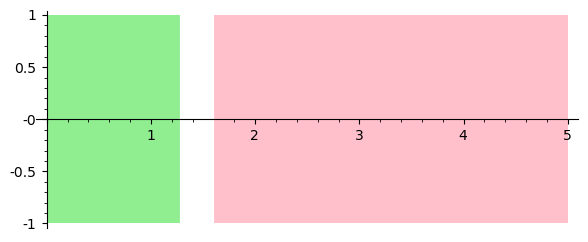

In [19]:
sig = csig.refined_signal(4)
sig.plot()

phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))
Computed 96 flowpipes in 0.41102742301882245 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f55fd38e940>, 0, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 5.2000000000000002], [[0.59999999999999997 .. 1.2000000000000002], [3.0999999999999996 .. 4.2000000000000002]]))
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.30 seconds
roots = [[0.72899770431682586 .. 1.2000000000000109]]
domain = [0.0000000000000000 .. 5.2020000000000009]
roots = [[0.72

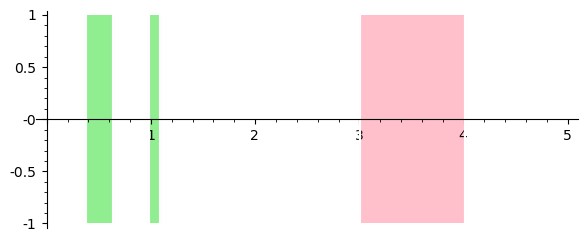

In [20]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
    mask=Mask(RIF(0, 5), [RIF(0.5, 1), RIF(3, 4)]),
)
sig.plot()

phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))
Computed 95 flowpipes in 0.4153965010191314 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f55fd38eee0>, 0, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 5.0020000000000007], [[0.0000000000000000 .. 5.0020000000000007]]))
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.69 seconds
roots = [[0.72899770431682586 .. 2.3396961789293478], [2.4054956907643583 .. 2.4223569572167918]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.7289

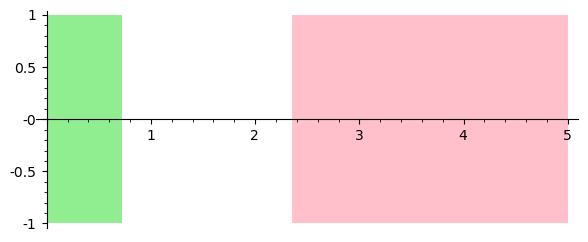

In [21]:
sig = P.signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

In [22]:
P

Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)

phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fd3cfac0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachT

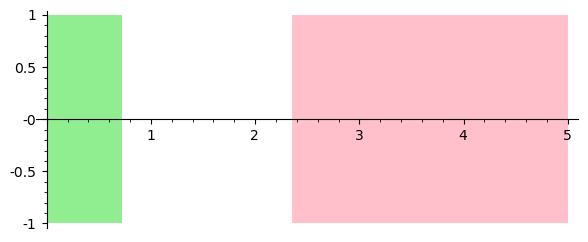

In [23]:
ctx_sig = P.context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fd3cfac0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f55fd32e340>
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.

top-level root detection: 1 items in 0.13 seconds
roots = [[1.9494069953384487 .. 2.2661983340704222]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.9494069953384487 .. 2.2661983340704222]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.9494069953384487 .. 2.2661983340704222]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9494069953384488], True), ([2.2661983340704221 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000

top-level root detection: 1 items in 0.16 seconds
roots = [[1.1587772868248296 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.1587772868248297], True), ([1.9796869398670811 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000

top-level root detection: 1 items in 0.14 seconds
roots = [[1.7307997868055611 .. 2.0249705401796408]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.7307997868055611 .. 2.0249705401796408]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.7307997868055611 .. 2.0249705401796408]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7307997868055612], True), ([2.0249705401796407 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000

top-level root detection: 1 items in 0.16 seconds
roots = [[1.1587772868248296 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.1587772868248297], True), ([1.9796869398670811 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000

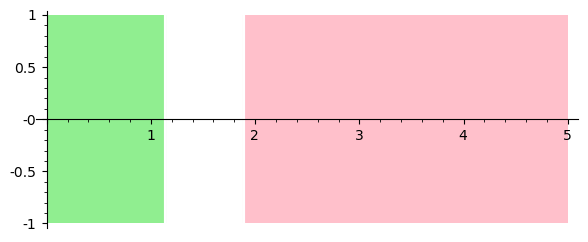

In [24]:
ctx_sig.refined_signal(2).plot()

phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fd25f8c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachT

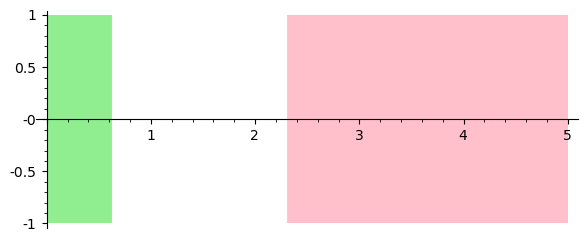

In [25]:
ctx_sig = F(RIF(0.1, 0.2), P).context_signal_for_system(
    s, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fd25f8c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f55fd247df0>
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.

top-level root detection: 1 items in 0.19 seconds
roots = [[1.0315253521806846 .. 2.1341310578689115]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.0315253521806846 .. 2.1341310578689115]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.0315253521806846 .. 2.1341310578689115]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.93152535218068456], True), ([2.0341310578689117 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.93152535218068456], True), ([2.0341310578689117 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.00000000000000

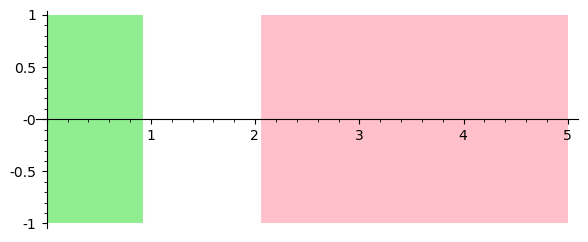

In [26]:
ctx_sig.refined_signal(1).plot()

 ==> creating ContextSignal with coord=(0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f55fd25f8c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f55f6514940>
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 

top-level root detection: 1 items in 0.12 seconds
roots = [[1.7938092808537906 .. 2.0598508475266369]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7938092808537906 .. 2.0598508475266369]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.7938092808537906 .. 2.0598508475266369]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6938092808537906], True), ([1.9598508475266369 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6938092808537906], True), ([1.9598508475266369 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000000000

top-level root detection: 1 items in 0.17 seconds
roots = [[1.1923460266102128 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1923460266102128 .. 1.9796869398670812]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.1923460266102128 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0923460266102128], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0923460266102128], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000000000

top-level root detection: 1 items in 0.14 seconds
roots = [[1.6591994220215213 .. 1.9975754606800860]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6591994220215213 .. 1.9975754606800860]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.6591994220215213 .. 1.9975754606800860]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5591994220215213], True), ([1.8975754606800860 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5591994220215213], True), ([1.8975754606800860 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000000000

top-level root detection: 1 items in 0.16 seconds
roots = [[1.1587772868248296 .. 1.9796869398670812]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.1587772868248296 .. 1.9796869398670812]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.8796869398670812 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0587772868248296], True), ([1.8796869398670812 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000000000

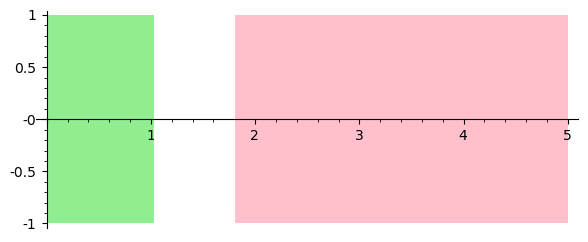

In [27]:
ctx_sig.refined_signal(2).plot()

In [28]:
csigGsf.plot_histogram2d(6)

NameError: name 'csigGsf' is not defined

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
{x: 1, y: 2}

In [ ]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [ ]:
sorted(kxs)

In [ ]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])